In [1]:
import pandas as pd
import datetime
import pyomo.environ as pyomo
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\JPSM1\AppData\Local\Temp\ipykernel_13052\31878173.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Caracteriisticas do edificio

A_wall_ext = {

    1: 14.7,
    2: 15.8,
    3: 5.98,
    4: 3.36,
    5: 5,
    6: 6.1,
    7: 6.22,
    8: 14.7,
    9: 6.1,
    10: 25.02
} 

A_glass_ext = {

    1: 3.3,
    2: 2.2,
    3: 1.1,
    4: 0,
    5: 2.2,
    6: 1.1,
    7: 1.1,
    8: 3.3,
    9: 1.1,
    10: 3.3
} 

U_wall_ext = 1.31
U_glass_ext = 2.85

A_wall_int = {

    1: 13.5,
    2: 12.24,
    3: 20.76,
    4: 24.48,
    5: 17.92,
    6: 17.92,
    7: 20.44,
    8: 7.68,
    9: 17.26,
    10: 23.16
}

A_glass_int = {

    1: 4.5,
    2: 5.76,
    3: 7.44,
    4: 0,
    5: 10.4,
    6: 10.4,
    7: 8,
    8: 10.32,
    9: 11.34,
    10: 16.08
} 

U_wall_int = 2.31
U_glass_int = 1.71

print(A_wall_ext[1])
#print(MA_wall * MA_wind)

14.7


In [3]:
# Matriz de contacto de sala (parede / janela)

MA_wall = np.zeros([11,11])

MA_wall[0] = [0, 6.3, 0, 0, 0, 0, 0, 0, 0, 3.6, 14.7]
MA_wall[1] = [6.3, 0, 3.84, 0, 0, 0, 0, 0, 0, 0, 15.8]
MA_wall[2] = [0, 3.84, 0, 10.56, 0, 0, 0, 0, 0, 3.64, 5.98]
MA_wall[3] = [0, 0, 10.56, 0, 10.56, 0, 0, 0, 0, 3.36, 3.36]
MA_wall[4] = [0, 0, 0, 10.56, 0, 3.52, 0, 0, 0, 3.84, 5]
MA_wall[5] = [0, 0, 0, 0, 3.52, 0, 10.56, 0, 0, 3.84, 6.1]
MA_wall[6] = [0, 0, 0, 0, 0, 10.56, 0, 5.92, 0, 3.96, 6.22]
MA_wall[7] = [0, 0, 0, 0, 0, 0, 2.56, 0, 5.12, 0, 14.7]
MA_wall[8] = [0, 0, 0, 0, 0, 0, 0, 5.28, 0, 1.04, 2.48]
MA_wall[9] = [3.6, 0, 3.64, 3.36, 3.84, 3.84, 3.84, 0, 1.04, 0, 25.02]
MA_wall[10] = [14.7, 15.8, 5.98, 3.36, 5, 6.1, 6.22, 14.7, 2.48, 25.02, 0]

print(MA_wall[0,9]) 

3.6


In [4]:
MA_glass = np.zeros([11,11])

MA_glass[0] = [0, 4.5, 0, 0, 0, 0, 0, 0, 0, 0, 3.3]
MA_glass[1] = [4.5, 0, 3.36, 0, 0, 0, 0, 0, 0, 0, 2.2]
MA_glass[2] = [0, 3.36, 0, 0, 0, 0, 0, 0, 0, 3.44, 1.1]
MA_glass[3] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
MA_glass[4] = [0, 0, 0, 0, 0, 7.04, 0, 0, 0, 3.36, 2.2]
MA_glass[5] = [0, 0, 0, 0, 7.04, 0, 0, 0, 0, 3.36, 1.1]
MA_glass[6] = [0, 0, 0, 0, 0, 0, 0, 4.64, 0, 3.36, 1.1]
MA_glass[7] = [0, 0, 0, 0, 0, 0, 4.64, 0, 5.68, 0, 3.3]
MA_glass[8] = [0, 0, 0, 0, 0, 0, 0, 5.52, 0, 2.56, 4.72]
MA_glass[9] = [0, 0, 3.44, 0, 3.36, 3.36, 3.36, 0, 2.56, 0, 3.3]
MA_glass[10] = [3.3, 2.2, 1.1, 0, 2.2, 1.1, 1.1, 3.3, 4.72, 3.3, 0]

print(MA_glass[0,0:10])

[0.  4.5 0.  0.  0.  0.  0.  0.  0.  0. ]


In [5]:
# Dados HVAC
filename = os.path.join('C:/temp',"simul_input_b.csv")
df = pd.read_csv(filename)
df.head() 
P_hvac = df["act_hvac"][0:96]
#plt.plot(P_hvac)
print(P_hvac[32]) 

ON_hvac = np.zeros(96)
ON_hvac[0:31] = 0
ON_hvac[32:80] = 1
ON_hvac[80:96] = 0

19.49217164


In [6]:
# Dados Temperatura exterior (Teste inicial T=20C)
T_ext = np.zeros(96)
T_ext[0:96] = 20

In [7]:
# Dados Edificio
Mvc = 1
Cv = 1

# Qocu Calor proveniente dos ocupantes
N_ocu = np.zeros((10,96))
N_ocu[0:9] = 1
q_ocu= 100

# Qeq Calor proveniente dos aparelhos
N_eq = np.zeros((10,96))
N_eq[0:9] = 1
q_eq = 150

# Qlight Calor proveniente das luzes
N_light = np.zeros((10,96))
N_light[0:10] = 3
q_light = 15

# Delta t (15 minutos -> 0.25 hora)
dt = 0.25

# Valores dos parametros de optimização
# Caso 1
w = {
    1: 0.151,
    2: 0.143,
    3: 0.353,
    4: 0.207,
    5: 0.128,
    6: 0.735,
    7: 0.741,
    8: 0.034,
    9: 0.604,
    10: 0.574

    #1: 0,
    #2: 0,
    #3: 0,
    #4: 0,
    #5: 0,
    #6: 0,
    #7: 0,
    #8: 0,
    #9: 0,
    #10: 0
}

p = {
    1: 0.042,
    2: 0.795,
    3: -0.169,
    4: 0.122,
    5: -0.201,
    6: -0.035,
    7: 1.532,
    8: -0.094,
    9: 1.651,
    10: -0.086   
}

# caracteristica de cada divisão
B1 = - ( A_wall_ext[1] * U_wall_ext + A_glass_ext[1] * U_glass_ext + A_wall_int[1] * U_wall_int + A_glass_int[1] * U_glass_int) / (Mvc *Cv)
B2 = - ( A_wall_ext[2] * U_wall_ext + A_glass_ext[2] * U_glass_ext + A_wall_int[2] * U_wall_int + A_glass_int[2] * U_glass_int) / (Mvc *Cv)
B3 = - ( A_wall_ext[3] * U_wall_ext + A_glass_ext[3] * U_glass_ext + A_wall_int[3] * U_wall_int + A_glass_int[3] * U_glass_int) / (Mvc *Cv)
B4 = - ( A_wall_ext[4] * U_wall_ext + A_glass_ext[4] * U_glass_ext + A_wall_int[4] * U_wall_int + A_glass_int[4] * U_glass_int) / (Mvc *Cv)
B5 = - ( A_wall_ext[5] * U_wall_ext + A_glass_ext[5] * U_glass_ext + A_wall_int[5] * U_wall_int + A_glass_int[5] * U_glass_int) / (Mvc *Cv)
B6 = - ( A_wall_ext[6] * U_wall_ext + A_glass_ext[6] * U_glass_ext + A_wall_int[6] * U_wall_int + A_glass_int[6] * U_glass_int) / (Mvc *Cv)
B7 = - ( A_wall_ext[7] * U_wall_ext + A_glass_ext[7] * U_glass_ext + A_wall_int[7] * U_wall_int + A_glass_int[7] * U_glass_int) / (Mvc *Cv)
B8 = - ( A_wall_ext[8] * U_wall_ext + A_glass_ext[8] * U_glass_ext + A_wall_int[8] * U_wall_int + A_glass_int[8] * U_glass_int) / (Mvc *Cv)
B9 = - ( A_wall_ext[9] * U_wall_ext + A_glass_ext[9] * U_glass_ext + A_wall_int[9] * U_wall_int + A_glass_int[9] * U_glass_int) / (Mvc *Cv)
Bhall = - ( A_wall_ext[10] * U_wall_ext + A_glass_ext[10] * U_glass_ext + A_wall_int[10] * U_wall_int + A_glass_int[10] * U_glass_int) / (Mvc *Cv)

B = [B1, B2, B3, B4, B5, B6, B7, B8, B9, Bhall]

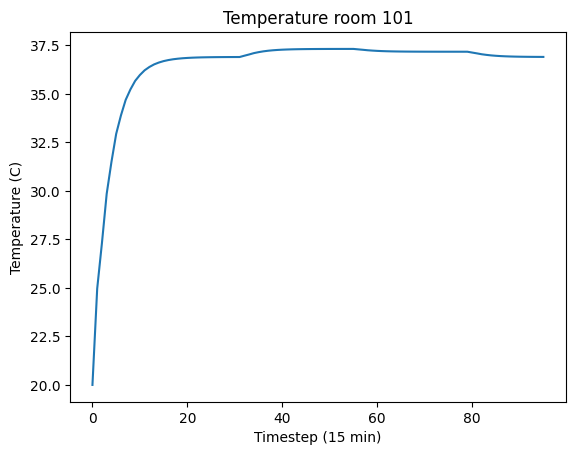

In [19]:
# Thermal Heating Model
def ter ( T0_1, T0_2, T0_3, T0_4, T0_5, T0_6, T0_7, T0_8, T0_9, T0_hall):
    T_in = np.zeros((10,96))
    T_in[0,0] = 20
    T_in[1,0] = 20
    T_in[2,0] = 20
    T_in[3,0] = 20
    T_in[4,0] = 20
    T_in[5,0] = 20
    T_in[6,0] = 20
    T_in[7,0] = 20
    T_in[8,0] = 20
    T_in[9,0] = 20

    for i in range(1,96):
        for j in range(1,11):
            Ca = T_ext[i-1] * (A_wall_ext[j] * U_wall_ext + A_glass_ext[j] * U_glass_ext)
            Cb = np.sum( T_in[:,i-1] * ( MA_wall[j-1,0:10] * U_wall_int + MA_glass[j-1,0:10] * U_glass_int) )
            Cc = N_eq[j-1,i] * q_eq + (P_hvac[i] * w[j]) * ON_hvac[i] + N_ocu[j-1,i] * q_ocu + N_light[j-1,i] * q_light
 
            C = ( Ca + Cb + Cc ) * (1 / (Mvc *Cv))

            T_in[j-1,i] = ( (T_in[j-1,i-1] * B[j-1] + C) * np.exp(B[j-1] *dt) - C ) / B[j-1] + p[j]

    return T_in

T_indoor = ter(1,2,3,4,5,6,7,8,9,10)

nt = range(96)

fig, ax = plt.subplots()
ax.plot(nt, T_indoor[3])

ax.set(xlabel='Timestep (15 min)', ylabel='Temperature (C)', title='Temperature room 101')

fig.savefig("test.png")
plt.show()


Auxiliar

In [9]:
#calculo C
T_in = np.zeros((10,96))
T_in[0,0] = 20
T_in[1,0] = 20
T_in[2,0] = 20
T_in[3,0] = 20
T_in[4,0] = 20
T_in[5,0] = 20
T_in[6,0] = 20
T_in[7,0] = 20
T_in[8,0] = 20
T_in[9,0] = 20

Ca = T_ext[0] * (A_wall_ext[1] * U_wall_ext + A_glass_ext[1] * U_glass_ext)
Cb = np.sum( T_in[:,0] * ( MA_wall[0,0:10] * U_wall_int + MA_glass[0,0:10] * U_glass_int) )
Cc = N_eq[0,0] * q_eq + (P_hvac[0] * w[1]) * ON_hvac[0] + N_ocu[0,0] * q_ocu + N_light[0,0] * q_light
 
C = ( Ca + Cb + Cc ) * (1 / (Mvc *Cv))

print(C)

T_in[0,1] = ( (T_in[0,0] * B1 + C) * np.exp(B1 *dt) - C ) / B + p[1]


1479.52


ValueError: setting an array element with a sequence.

In [ ]:
Btreino = - (MA_wall[10,0:10] * U_wall_ext + MA_glass[10,0:10] * U_glass_ext + MA_wall[0:10,0:10] * U_wall_int + MA_glass[0:10,0:10] * U_glass_int) / (Mvc *Cv)
print(Btreino)



# -------------------------- --------------#
Bt = - (MA_wall[10,0] * U_wall_ext + MA_glass[10,0] * U_glass_ext + MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int) / (Mvc *Cv)
print(Bt)

#MA_wall[10,0] * U_wall_ext
#MA_glass[10,0] * U_glass_ext

#MA_wall[0:10,0] * U_wall_int
#MA_glass[0:10,0] * U_glass_int
MA_wall[10,0] * U_wall_ext + MA_glass[10,0] * U_glass_ext + MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int
MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int

[[-0.071655 -0.12304  -0.027422 -0.011004 -0.03205  -0.027815 -0.028208
  -0.071655 -0.041752 -0.126243]
 [-0.127275 -0.06742  -0.063962 -0.011004 -0.03205  -0.027815 -0.028208
  -0.071655 -0.041752 -0.105453]
 [-0.071655 -0.10396  -0.027422 -0.071988 -0.03205  -0.027815 -0.028208
  -0.071655 -0.041752 -0.14118 ]
 [-0.071655 -0.06742  -0.088406 -0.011004 -0.093034 -0.027815 -0.028208
  -0.071655 -0.041752 -0.124857]
 [-0.071655 -0.06742  -0.027422 -0.071988 -0.03205  -0.078239 -0.028208
  -0.071655 -0.041752 -0.141993]
 [-0.071655 -0.06742  -0.027422 -0.011004 -0.082474 -0.027815 -0.089192
  -0.071655 -0.041752 -0.141993]
 [-0.071655 -0.06742  -0.027422 -0.011004 -0.03205  -0.088799 -0.028208
  -0.125679 -0.041752 -0.142686]
 [-0.071655 -0.06742  -0.027422 -0.011004 -0.03205  -0.027815 -0.062828
  -0.071655 -0.095602 -0.105453]
 [-0.071655 -0.06742  -0.027422 -0.011004 -0.03205  -0.027815 -0.028208
  -0.125745 -0.041752 -0.122403]
 [-0.092445 -0.06742  -0.063149 -0.030408 -0.06859  -0.

In [ ]:
B1 = - (MA_wall[10,0] * U_wall_ext + MA_glass[10,0] * U_glass_ext + MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int) / (Mvc *Cv)
print(B1)

#MA_wall[10,0] * U_wall_ext
#MA_glass[10,0] * U_glass_ext

#MA_wall[0:10,0] * U_wall_int
#MA_glass[0:10,0] * U_glass_int
MA_wall[10,0] * U_wall_ext + MA_glass[10,0] * U_glass_ext + MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int
MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int

print(MA_wall[0:10,0] * U_wall_int)
print(MA_glass[0:10,0] * U_glass_int)
print(MA_wall[0:10,0] * U_wall_int + MA_glass[0:10,0] * U_glass_int)

[-0.071655 -0.127275 -0.071655 -0.071655 -0.071655 -0.071655 -0.071655
 -0.071655 -0.071655 -0.092445]
[ 0.    14.553  0.     0.     0.     0.     0.     0.     0.     8.316]
[0.    7.695 0.    0.    0.    0.    0.    0.    0.    0.   ]
[ 0.    22.248  0.     0.     0.     0.     0.     0.     0.     8.316]
